In [15]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [16]:
#Load Insurance Dataset
dataset = pd.read_csv('insurance.csv')


In [17]:
#functions to convert to numerical data for Sex, Smoker, Region Features
def sex_fun(x):
    if x=="male":
        return 0
    else:
        return 1

def smoker_fun(x):
    if x=="yes":
        return 1
    else:
        return 0

def region_fun(x):
    if x=="northeast":
        return 0
    elif x=="northwest":
        return 1
    elif x=="southeast":
        return 2
    elif x=="southwest":
        return 3

In [18]:
#Apply functions for data mapping
dataset['sex']=dataset['sex'].apply(sex_fun)
dataset['smoker']=dataset['smoker'].apply(smoker_fun)
dataset['region']=dataset['region'].apply(region_fun)

# Feature Selection

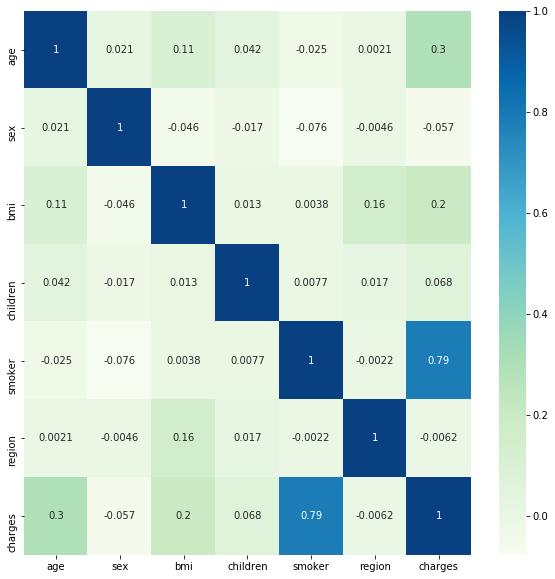

In [19]:
#plot heatmap to know the correlation between features
corr_mat=dataset.corr()
plt.figure(figsize=(10,10))
sb.heatmap(data=corr_mat,annot=True,cmap='GnBu')
plt.show()

# PCA

In [20]:
#set independent and dependent features
x=dataset.iloc[:,0:6]
y=dataset.iloc[:,6]

In [44]:
#Find PCA components
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=4)
pc = pca.fit_transform(x)

linreg=LinearRegression()
linreg.fit(pc,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [45]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.20060309 0.1813664  0.16992314 0.16087702]
0.7127696539481675


In [46]:
#split test and train data
X_train_PCA,X_test_PCA,Y_train_PCA,Y_test_PCA=train_test_split(pc,y,random_state=0)

In [47]:
#train the model
import time
linreg=LinearRegression()
start_time=time.time()
linreg.fit(X_train_PCA,Y_train_PCA)
end_time=time.time()
print ("------%s seconds-------" %(end_time-start_time))

------0.0019965171813964844 seconds-------


In [49]:
#predict using PCA components
predict=linreg.predict(X_test_PCA)
r2_score(Y_test_PCA, predict) 

0.4604345820321726

# Train Model using all features

In [35]:
#split dataset for train and test
X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state=0)

In [36]:
#train model
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

#record trainning time
start_time=time.time()
linreg.fit(X_train,Y_train)
end_time=time.time()
print ("------%s seconds-------" %(end_time-start_time))

------0.0010318756103515625 seconds-------


In [37]:
#predict test data
predict=linreg.predict(X_test)

In [38]:
#evaluate the model
r2_score(Y_test, predict) 

0.7962732059725786